# Text Module Example



In [1]:

import pandas as pd
import matplotlib.pyplot as plt

from pvops.text import utils

import text_class_example


[nltk_data] Error loading punkt: <urlopen error [Errno 110] Connection
[nltk_data]     timed out>


## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [2]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [3]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

This step is 

In [4]:
asset_remap_filename = 'remappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [5]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = utils.remap_attributes(df.iloc[30:], remapping_df.iloc[20:], remapping_col_dict, allow_missing_mappings=True)

df = df_remapped_assets

/home/klbonne/Documents/GitHub/pvOps/pvops/text/utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remapping_df[REMAPPING_COL_FROM] = remapping_df[REMAPPING_COL_FROM].str.lower()
/home/klbonne/Documents/GitHub/pvOps/pvops/text/utils.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remapping_df[REMAPPING_COL_TO] = remapping_df[REMAPPING_COL_TO].str.lower()
/home/klbonne/Documents/GitHub/pvOps/pvops/text/utils.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [6]:
df[LABEL_COLUMN].value_counts()

inverter                  26
facility                  24
tracker                    6
combiner                   4
other                      2
substation                 2
transformer                1
ground-mount pv system     1
energy storage             1
energy meter               1
met station                1
pyranometer                1
Name: Asset, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [7]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

inverter                  26
facility                  24
tracker                    6
combiner                   4
other                      2
substation                 2
transformer                1
ground-mount pv system     1
energy storage             1
energy meter               1
met station                1
pyranometer                1
Name: Asset, dtype: int64
DETAILS
  70 samples
  0 invalid documents
  29.16 words per sample on average
  Number of unique words 881
  2041.00 total words


### Visualize timeseries of ticket publications

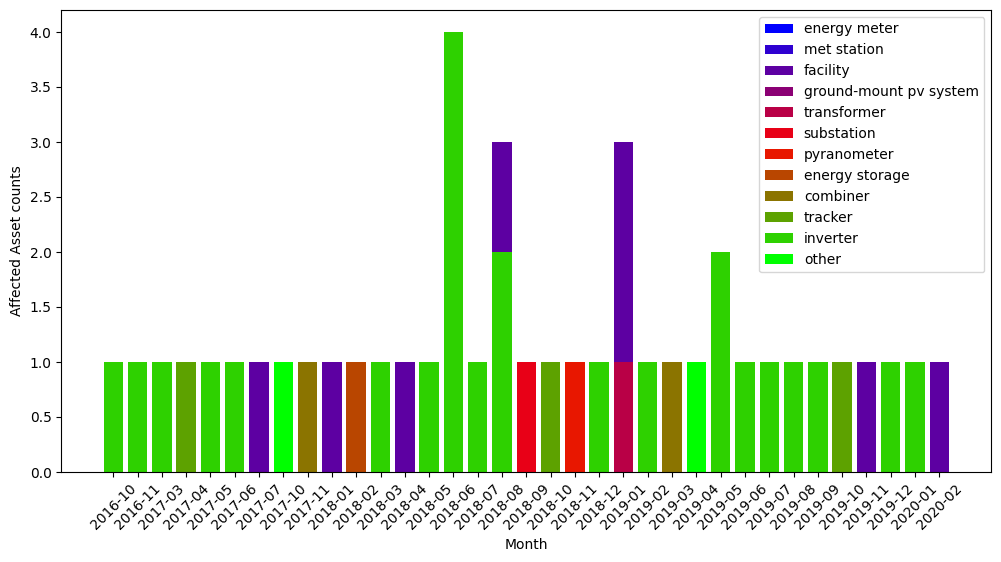

In [8]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [9]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,8/39/19 inverter was faulted with lp15 (low pr...,[2019-08-17 07:35:00]
1,"11,july 2018 -upon arrival w-a6-2, inverter is...","[2018-07-11 18:55:00, 2018-06-02 18:55:00, 201..."
2,arrived site checked into c4. i was able to pi...,[2020-05-26 14:45:00]
3,c4 closed site remotely. techdispatched: no,[]
4,inspection troubleshooting malfunctioning trac...,[]
...,...,...
65,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
66,c4 closed remotely. techdispatched: no,[]
67,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
68,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [10]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,resolved,resolved
1,performed repair for inverters g & h. techdisp...,performed repair inverters techdispatched
2,logging time for daily inspections. these insp...,logging time daily inspections inspections inc...
3,this is redundant created by c4. i asked them ...,redundant created asked cancel obviously assig...
4,fixed by contractor. techdispatched: no,fixed contractor techdispatched
...,...,...
59,quarterly for completed day 12/11/2018. techdi...,quarterly completed day techdispatched
60,c4 was unable to establish comms with site. ch...,unable establish comms site checked equipment ...
61,checked network connection to rm-1 didn't see ...,checked network connection n see issues activi...
62,"2/21/2018, f. verified that cb 3.a5 has been r...",verified cb restored visited site parallel wor...


### Results of text processing

In [11]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  64 samples
  0 invalid documents
  27.95 words per sample on average
  Number of unique words 778
  1789.00 total words

Post-text processing
DETAILS
  64 samples
  0 invalid documents
  17.31 words per sample on average
  Number of unique words 489
  1108.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

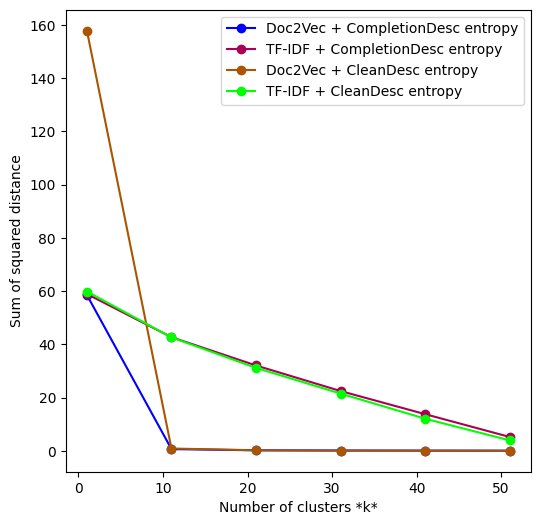

In [12]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

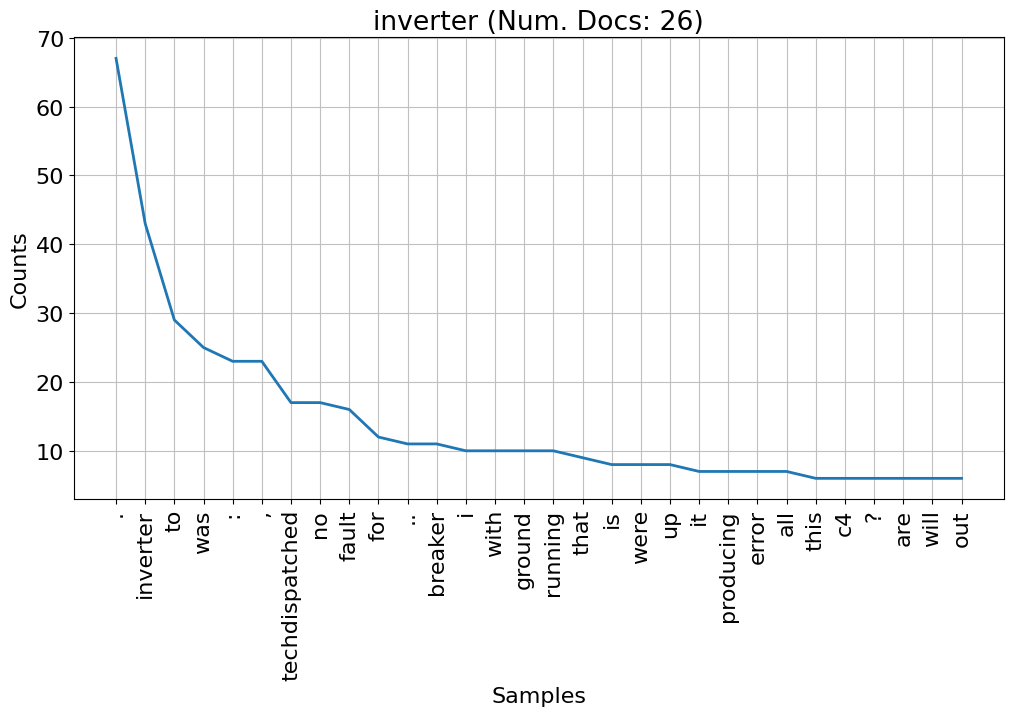

In [13]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

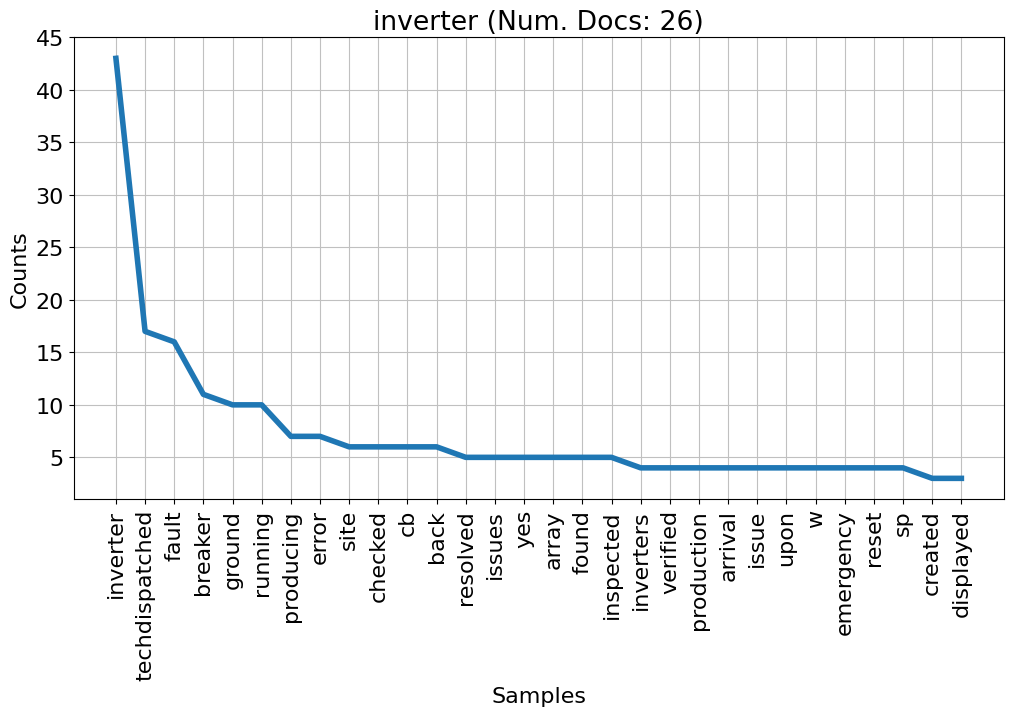

In [14]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

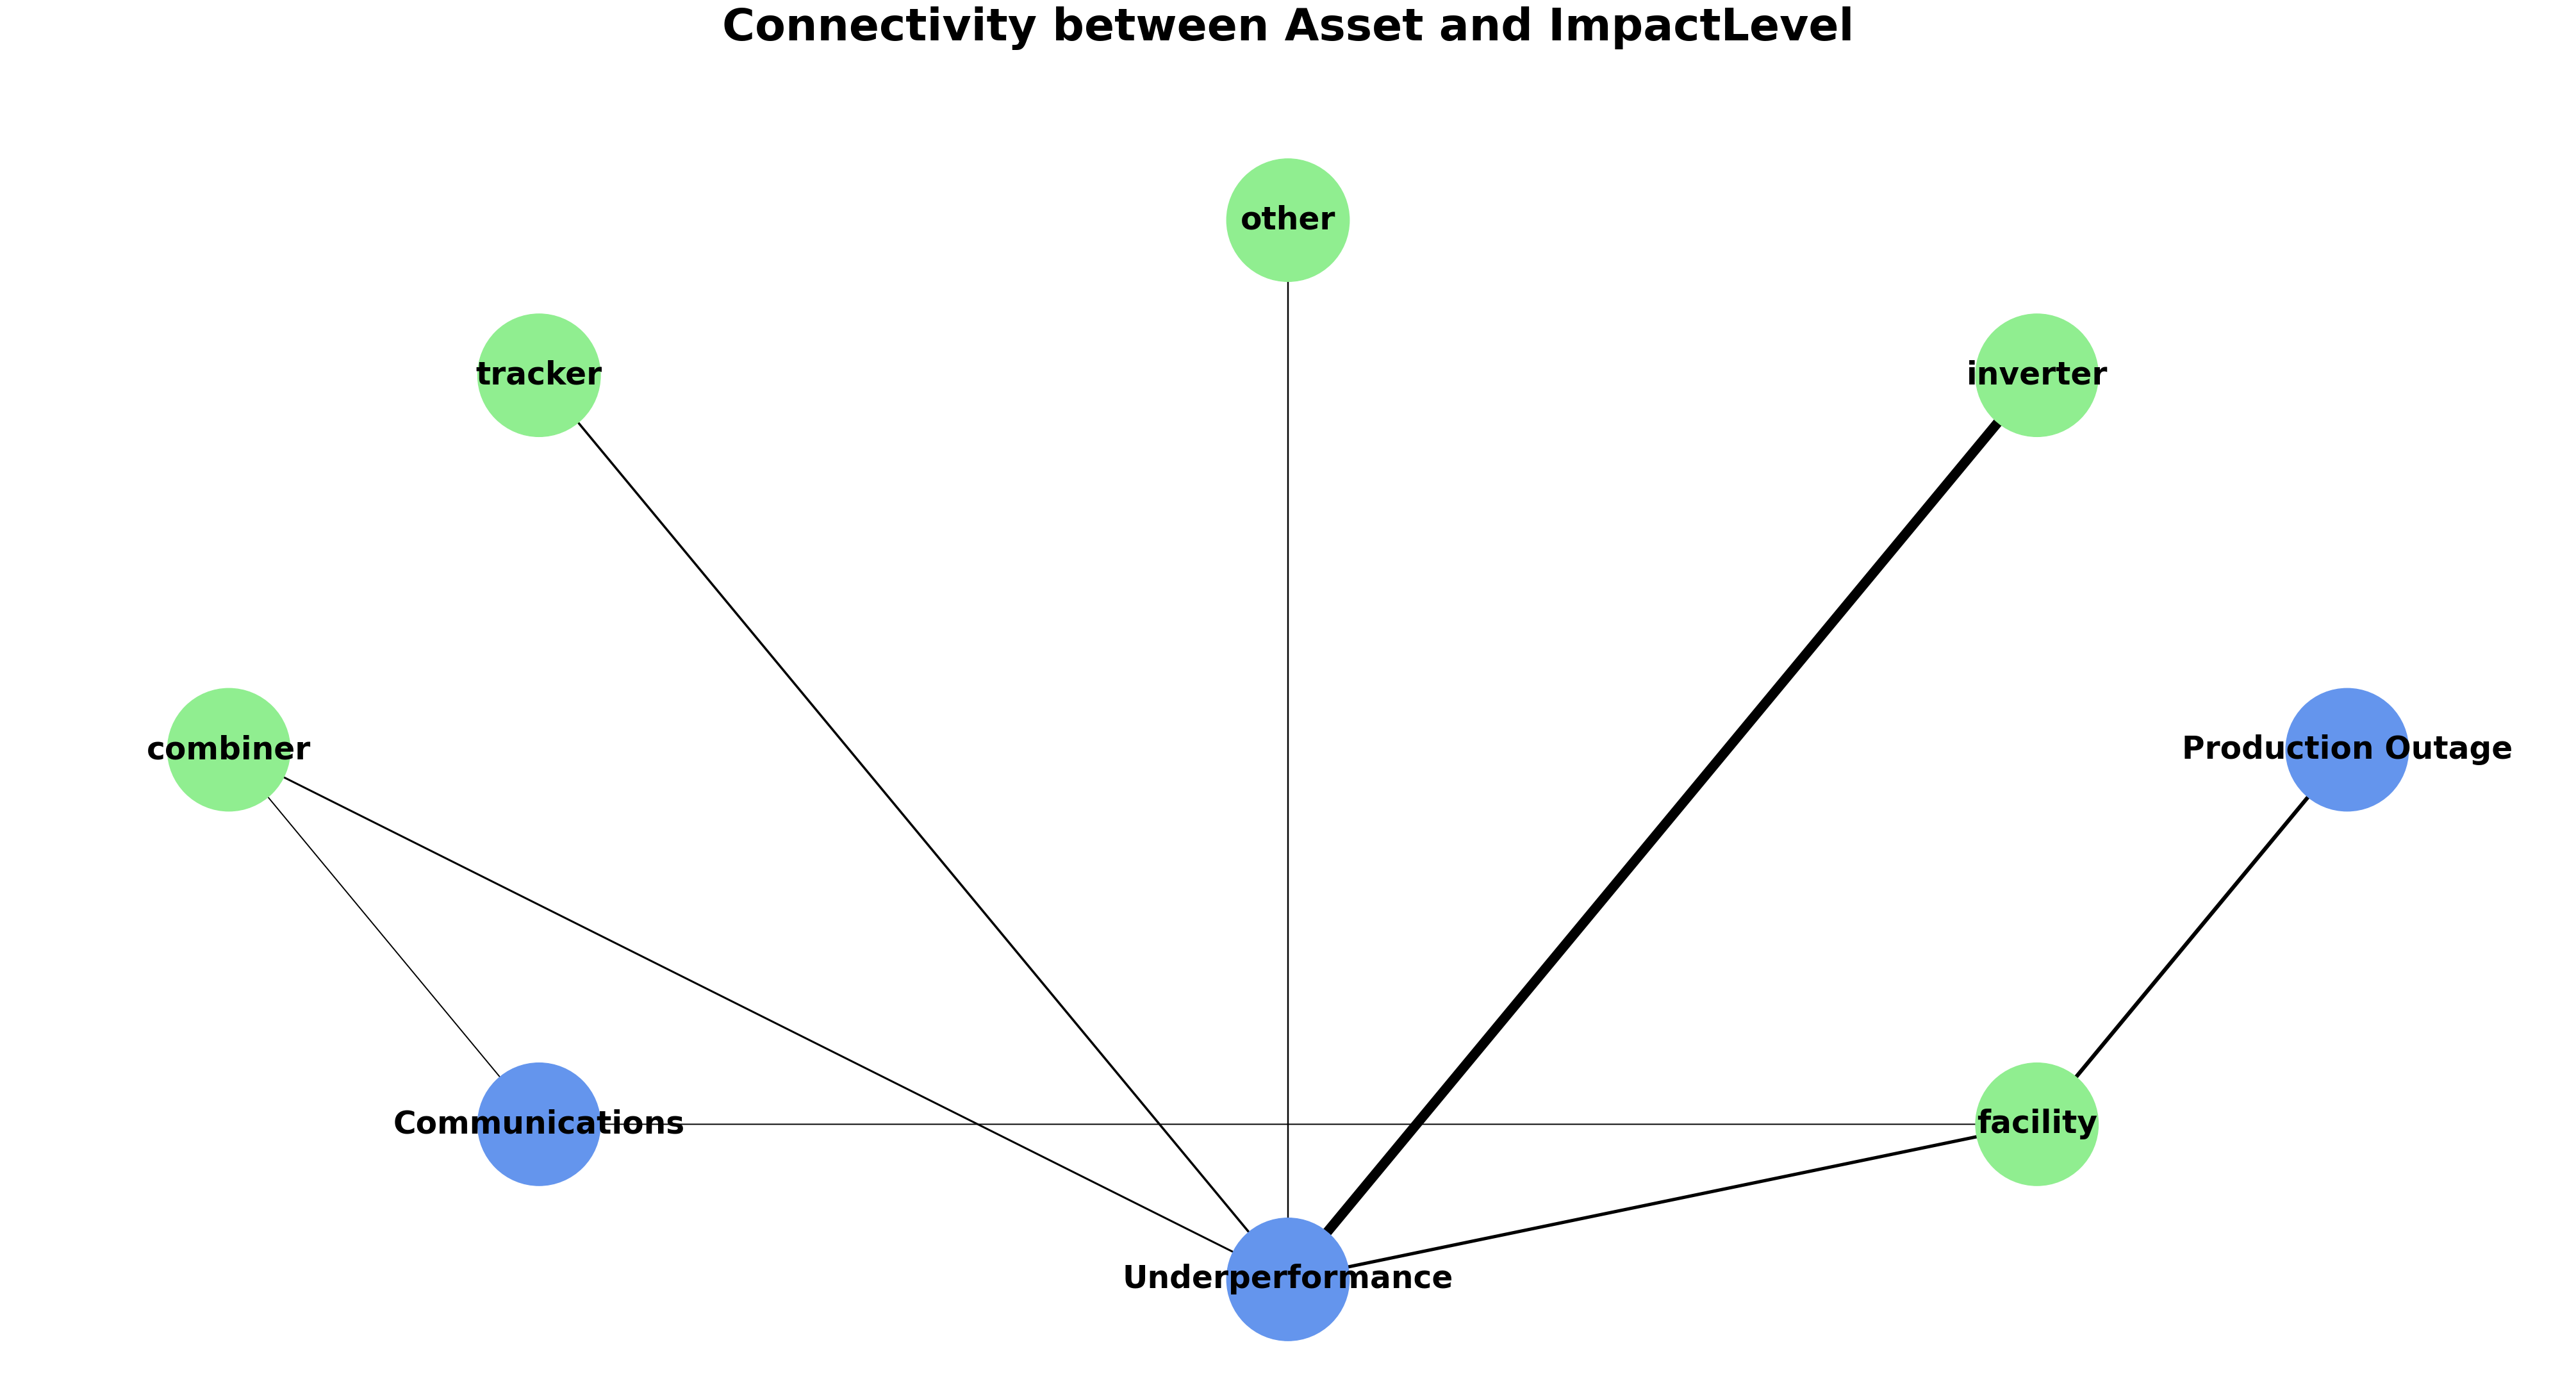

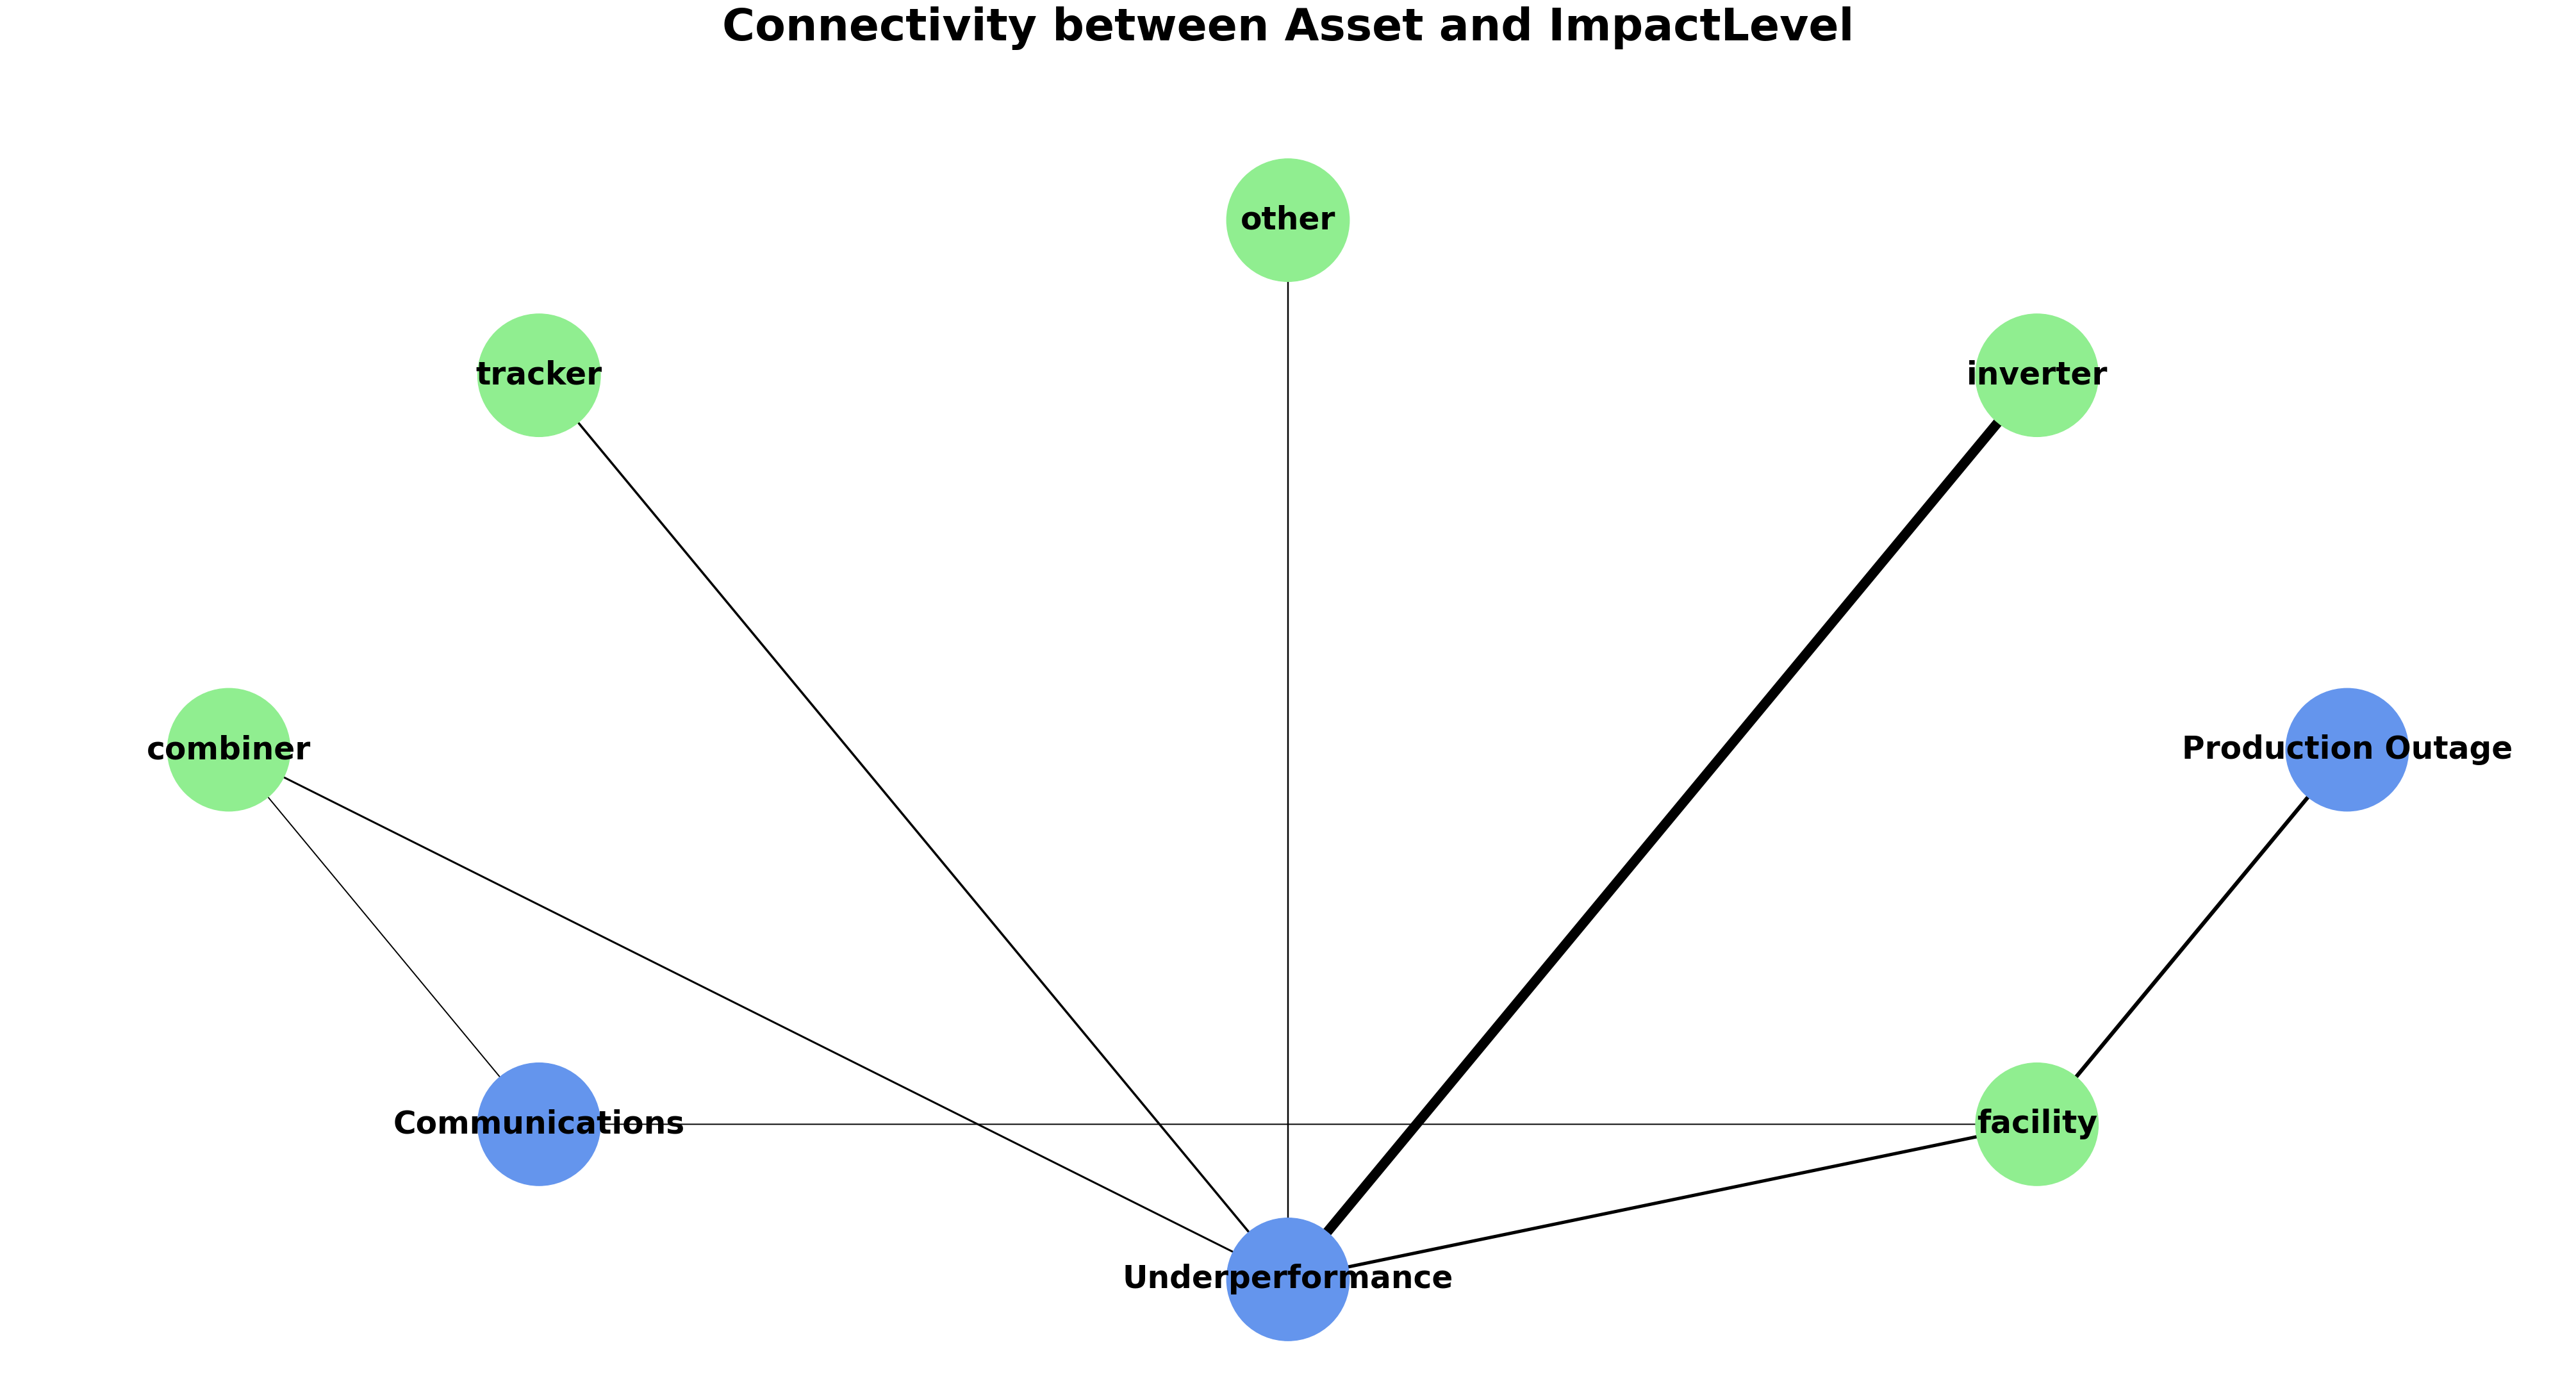

In [15]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
)
plt.show()

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
    )
plt.show()

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [16]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings


/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', SGDClassifier(alpha=0.01, loss='squared_hinge'))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,...,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__normalize,clf__n_estimators,clf__max_samples,clf__algorithm
54,SGDClassifier,0.467672,0.518128,0.568583,0.050455,0.007158,NaN,NaN,"(1, 3)",None,...,0.01,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
44,PassiveAggressiveClassifier,0.467672,0.504657,0.541642,0.036985,0.010384,0.1,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
46,PassiveAggressiveClassifier,0.467672,0.504557,0.541441,0.036884,0.010069,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
45,PassiveAggressiveClassifier,0.467672,0.502586,0.5375,0.034914,0.009779,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN,NaN
61,BaggingClassifier,0.475379,0.502279,0.529179,0.0269,0.35517,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,LinearSVC,0.297749,0.325266,0.352782,0.027517,0.008547,0.01,800,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SVC,0.234722,0.234722,0.234722,0.0,0.006698,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SVC,0.234722,0.234722,0.234722,0.0,0.006788,1.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,PassiveAggressiveClassifier,0.007353,0.007353,0.007353,0.0,0.008953,0.0,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN,NaN


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [17]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings


/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (6). Decrease the threshold.
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (6). Decrease the threshold.
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (6). Decrease the threshold.
  warnings.warn(
/home/klbonne/.local/bin/anaconda3/envs/pvops_dev/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (6). Decrease the threshold.
  warnings.warn(


best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()),
                ('clf', AffinityPropagation(damping=0.9))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
2,AffinityPropagation,0.341631,0.359911,0.37819,0.01828,0.020102,0.9,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AffinityPropagation,0.337876,0.342865,0.347854,0.004989,0.024346,0.9,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Birch,0.262572,0.340273,0.417973,0.077701,0.038561,NaN,NaN,"(1, 3)",None,50,6,0.5,NaN,NaN,NaN,NaN
7,Birch,0.262572,0.340273,0.417973,0.077701,0.060437,NaN,NaN,"(1, 3)",None,100,6,0.5,NaN,NaN,NaN,NaN
12,KMeans,0.254851,0.320739,0.386626,0.065887,0.373013,NaN,NaN,"(1, 3)",None,NaN,6,NaN,k-means++,100,NaN,NaN
15,KMeans,0.292426,0.306652,0.320878,0.014226,0.169264,NaN,NaN,"(1, 3)",None,NaN,6,NaN,random,100,NaN,NaN
0,AffinityPropagation,0.277353,0.284676,0.291999,0.007323,0.023008,0.5,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AffinityPropagation,0.267082,0.27252,0.277959,0.005438,0.02603,0.5,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,KMeans,0.22989,0.258617,0.287345,0.028728,0.044659,NaN,NaN,"(1, 3)",None,NaN,6,NaN,k-means++,10,NaN,NaN
11,KMeans,0.226542,0.244634,0.262727,0.018093,0.198249,NaN,NaN,"(1, 3)",None,NaN,6,NaN,k-means++,50,NaN,NaN


In [18]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', SGDClassifier(alpha=0.01, loss='squared_hinge'))])
Predictions stored to Supervised_Pred_Asset in `df` attribute
Score: 0.9555706521739131


In [19]:
e.predict_best_model(ml_type = 'unsupervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()),
                ('clf', AffinityPropagation(damping=0.9))])
Predictions stored to Unsupervised_Pred_Asset in `df` attribute
Score: 0.42116032330948466


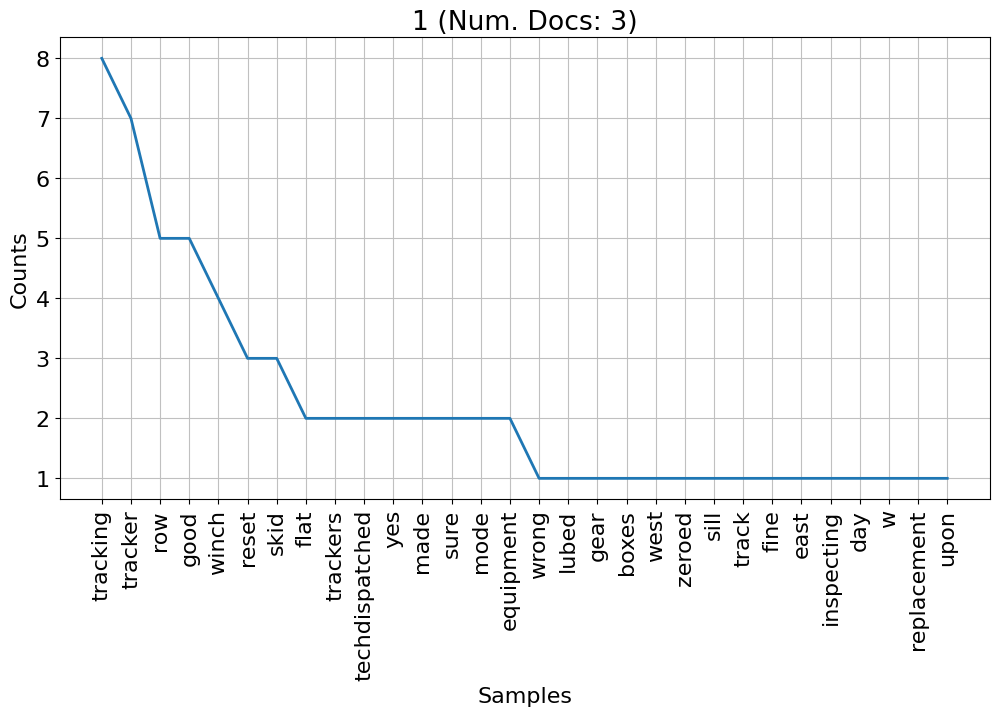

FreqDist({'tracking': 8, 'tracker': 7, 'row': 5, 'good': 5, 'winch': 4, 'reset': 3, 'skid': 3, 'flat': 2, 'trackers': 2, 'techdispatched': 2, ...})

In [20]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

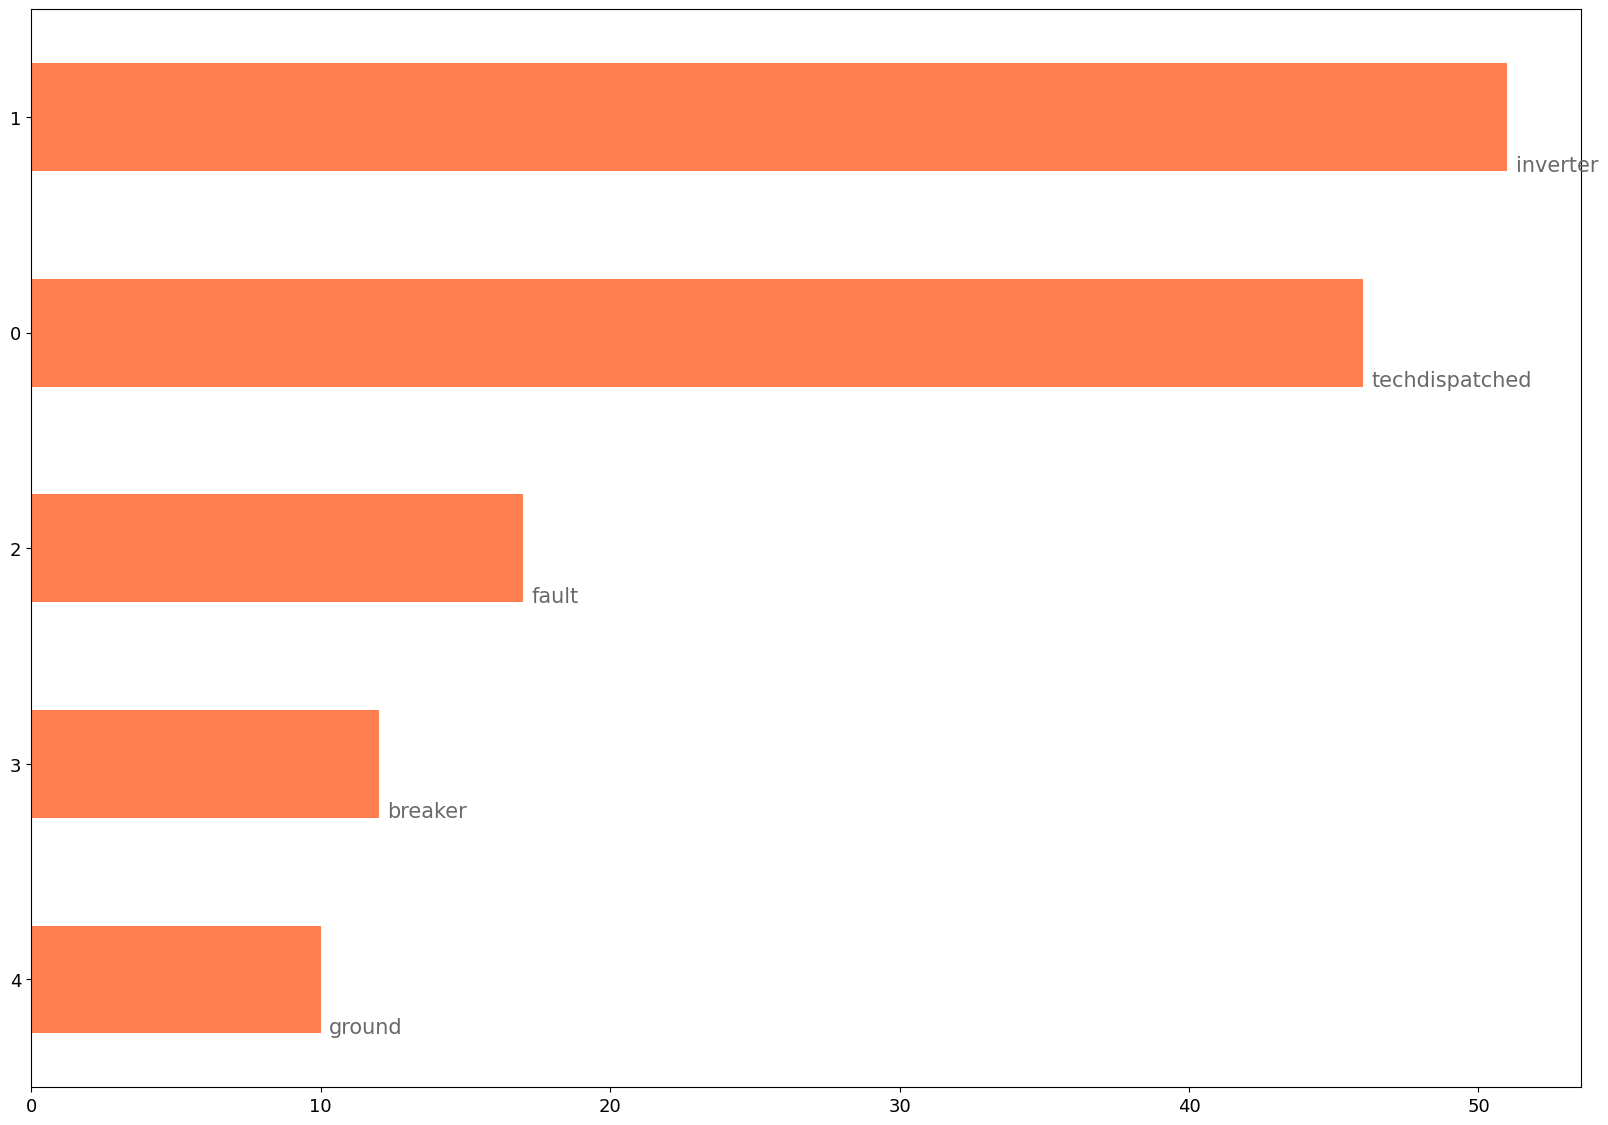

In [21]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

### Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list